In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


plt.style.use('ggplot')
sns.__version__

'0.9.0'

## Load dataset

In [2]:
df = pd.read_csv('../input/heart.csv')

## Description of columns

1. age: in years
2. sex: (1 = male; 0 = female)
3. cp: chest pain type
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak: ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target: 1 or 0

## Print values for each feature of first 5 samples

In [3]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Print total number of features available and names

In [4]:
print('total number of features: ', len(df.columns)-1)
print("Feature names: ", list(df.columns.drop('target')))

total number of features:  13
Feature names:  ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


## Unique values in all columns

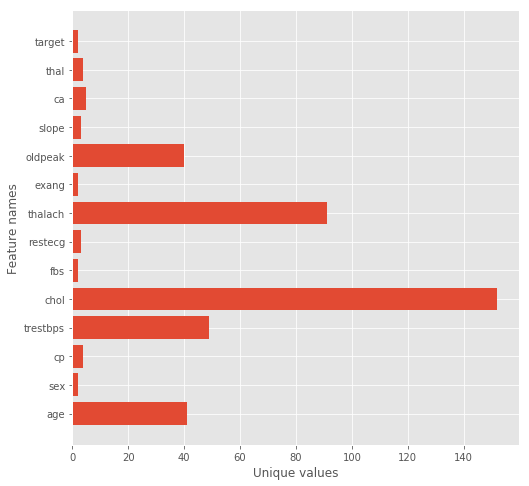

In [5]:
columns = df.columns
unique = df.nunique()
plt.figure(figsize=(8, 8))
plt.barh(columns, unique)
plt.xlabel('Unique values')
plt.ylabel('Feature names')
plt.show()

In [6]:
print('Unique values in Target: ',  df['target'].nunique())

Unique values in Target:  2


### Hence, this is a binary classification problem. 

## Descriptive statistics for each column

In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Check any NaN value in dataset

In [8]:
df.isnull().values.any()

False

## Print columns' information

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


## Find the significant features for predicting target

In [10]:
pd.DataFrame(df.corr(method='spearman')['target'])

,target
age,-0.238400
sex,-0.280937
cp,0.460860
trestbps,-0.121593
chol,-0.120888
fbs,-0.028046
restecg,0.148612
thalach,0.428370
exang,-0.436757
oldpeak,-0.421487


### From above, chest pain type (cp), maximum heart rate achieved (thalach) are top 2 features.

### For KDE, Strip plot and pairplot mapping, 4 features are used which positively correlated to target variable

## Strip plot

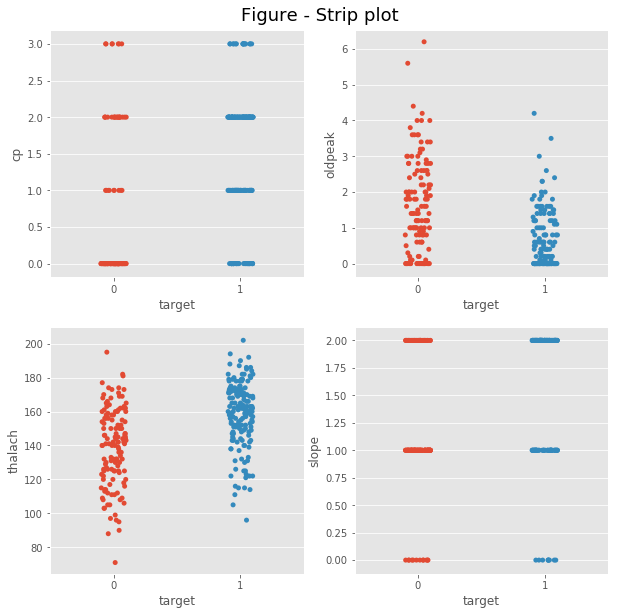

In [11]:
vars = np.array(['cp', 'oldpeak', 'thalach', 'slope'])
plt.figure(figsize=(10, 10))
for i in vars:
    plt.subplot(2,2,np.where(i == vars)[0][0]+1)
    sns.stripplot(x="target", y=i, data=df)
    
plt.suptitle('Figure - Strip plot', x=0.5, y=0.9, verticalalignment='center', fontsize= 18)
plt.show()

##  Kernel density estimation plot

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


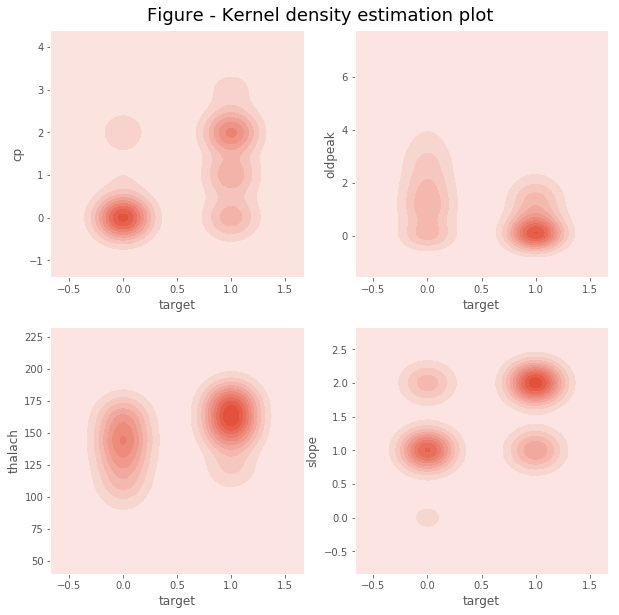

In [12]:
vars = np.array(['cp', 'oldpeak', 'thalach', 'slope'])
plt.figure(figsize=(10, 10))
for i in vars:
    plt.subplot(2,2,np.where(i == vars)[0][0]+1)
    sns.kdeplot(df['target'], df[i], shade=True, cut=4)
    
plt.suptitle('Figure - Kernel density estimation plot', x=0.5, y=0.9, verticalalignment='center', fontsize= 18)
plt.show()

### Both the above plots show the distribution of highly correlated features wrt target, but KDE provides dense distribution.

## Scatter plot

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


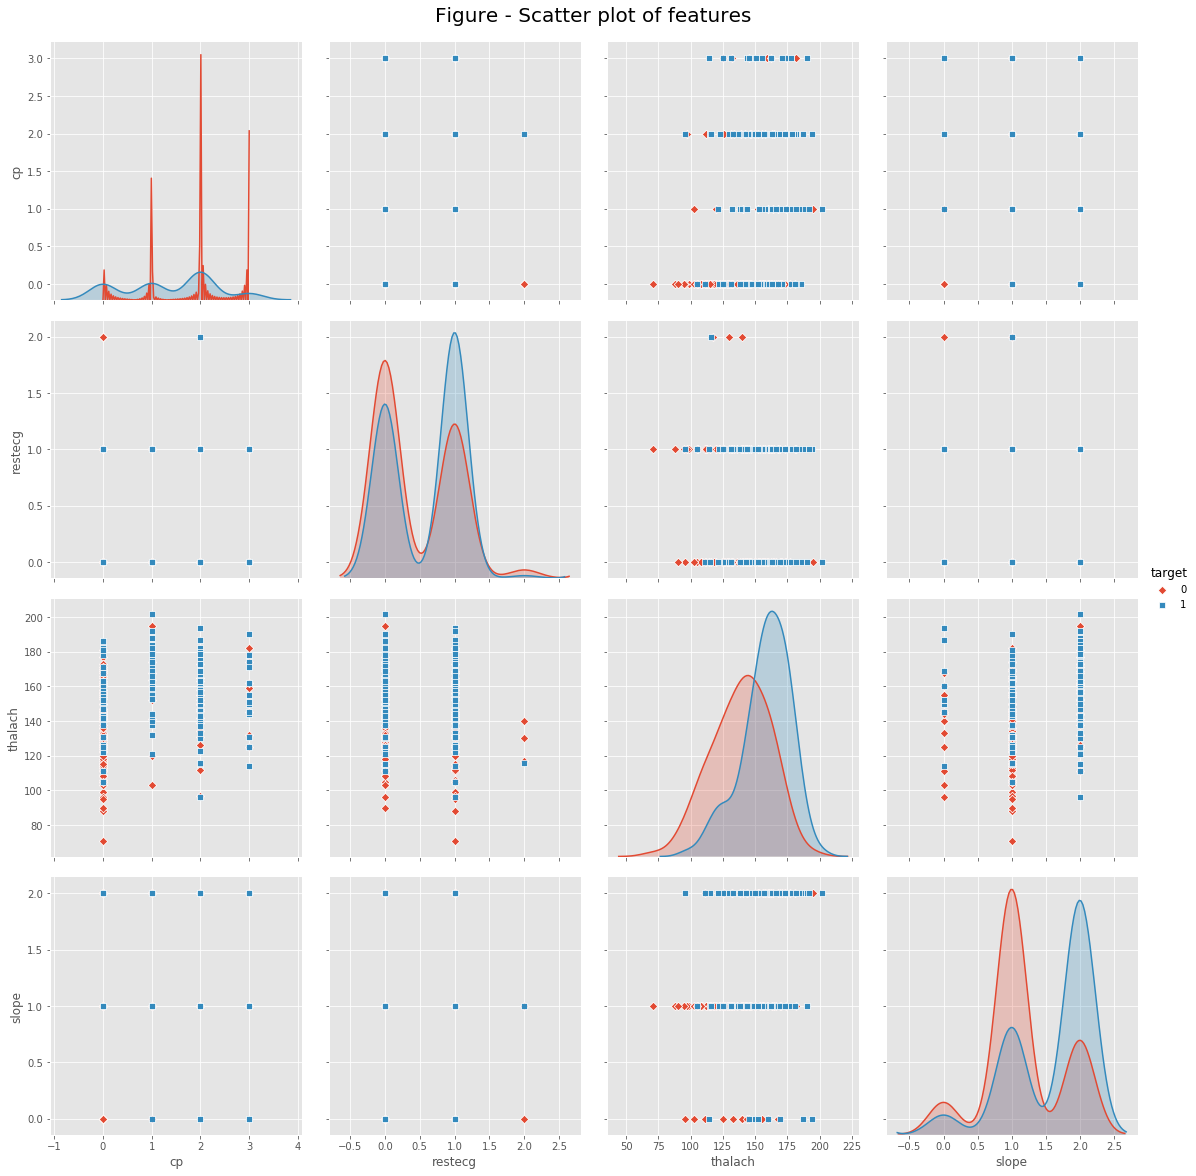

In [13]:
sns.pairplot(df, vars=['cp', 'restecg', 'thalach', 'slope'], height=4, hue='target', 
             diag_kind='kde', markers=["D", "s"], diag_kws=dict(shade=True))
plt.suptitle('Figure - Scatter plot of features ', x=0.5, y=1.01, verticalalignment='center', fontsize= 20)
plt.show()

## Histogram for dispered features

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


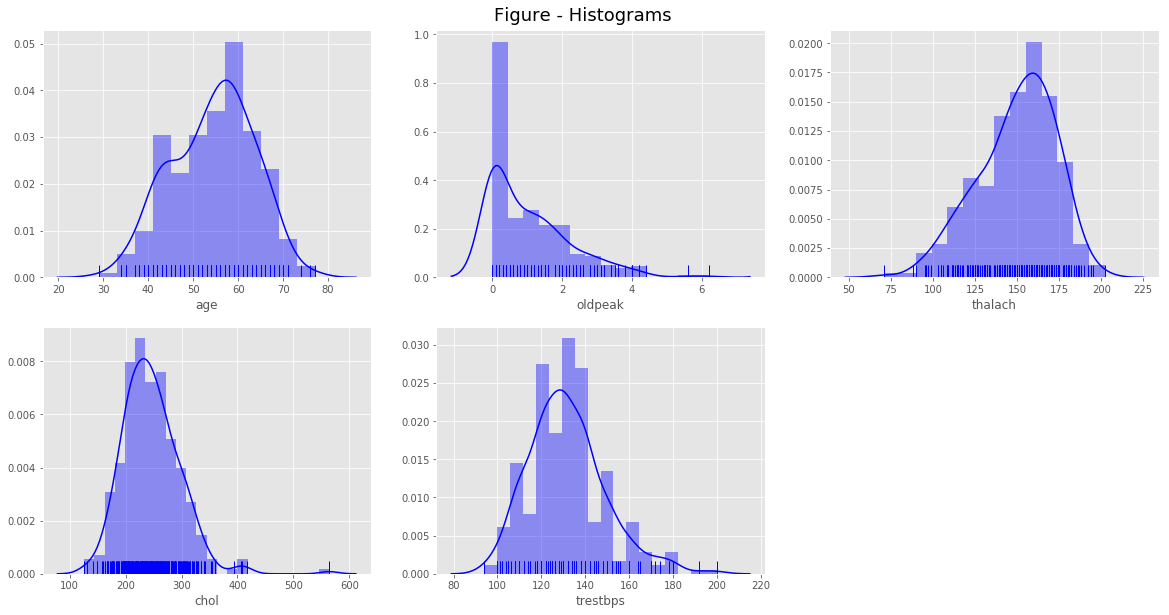

In [14]:
vars = np.array(['age', 'oldpeak', 'thalach', 'chol', 'trestbps'])
plt.figure(1 , figsize=(20, 10))
for i in vars:
    plt.subplot(2,3,np.where(i == vars)[0][0]+1)
    sns.distplot(a = df[i], rug=True, color = 'blue')

plt.suptitle('Figure - Histograms', x=0.5, y=0.9, verticalalignment='center', fontsize= 18)
plt.show()

## Barplot of age and sex wrt target variable

Text(0.5,0.9,'Figure - Count plot of sex and age with target grouping variable')

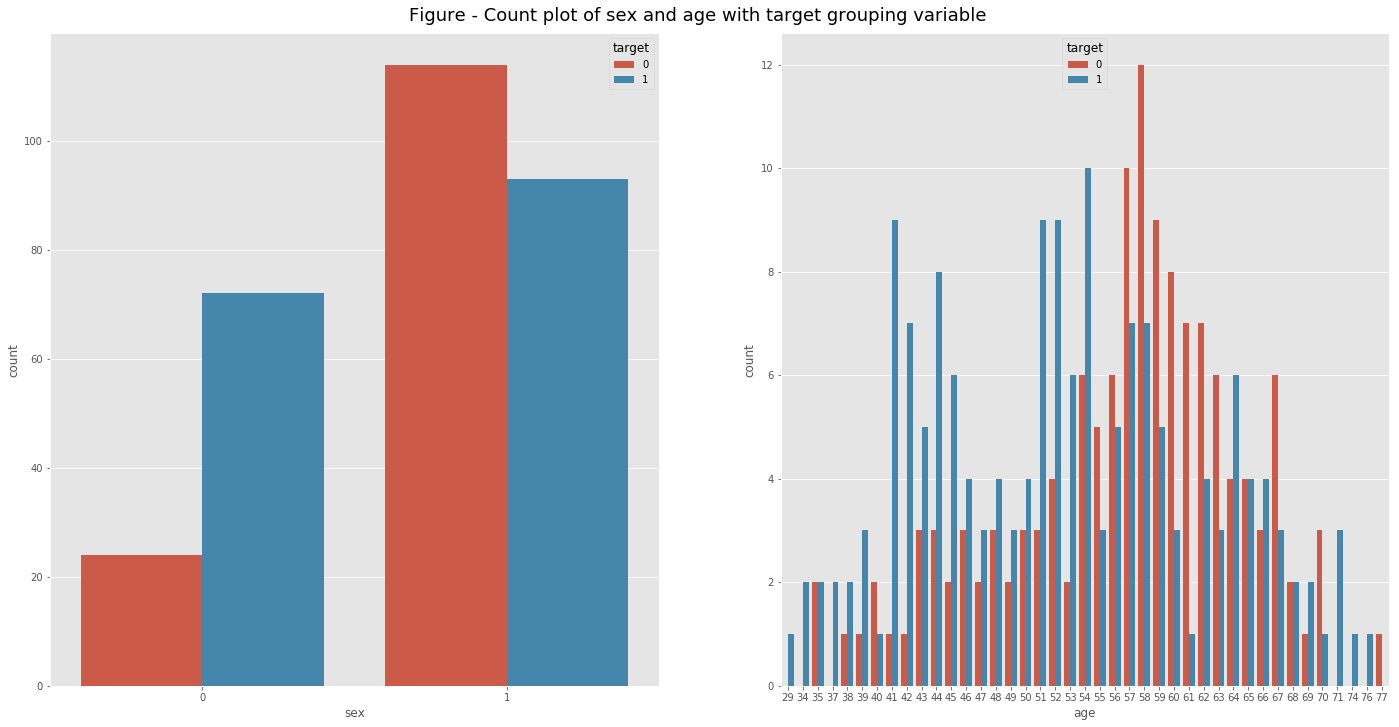

In [15]:
plt.figure(figsize=(24,12))
plt.subplot(1,2,1)
sns.countplot(x="sex", hue='target', data=df)
plt.subplot(1,2,2)
sns.countplot(x="age", hue='target', data=df)
plt.suptitle('Figure - Count plot of sex and age with target grouping variable', 
             x=0.5, y=0.9, verticalalignment='center', fontsize= 18)

### Left plot shows that just great than 20 females and more than 100 males have no heart problem. The latter plot signifies that people over 54 age have less heart problems.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


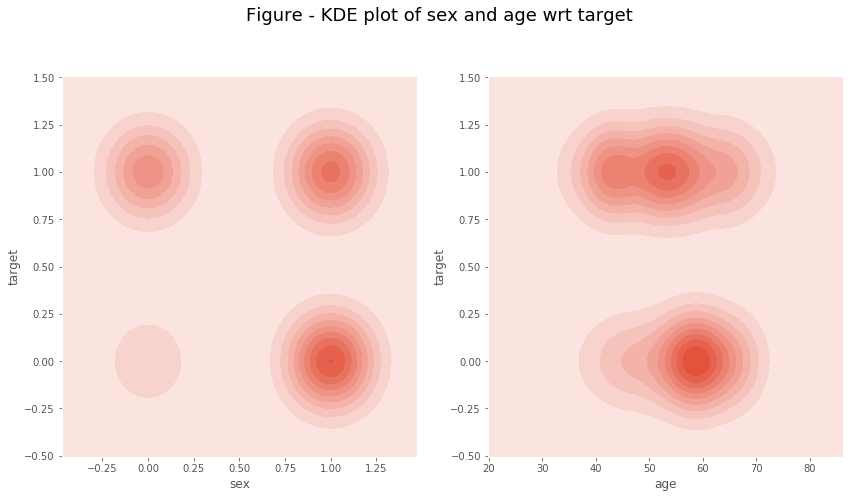

In [16]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.kdeplot(df['sex'], df['target'], shade=True, cut=3)
plt.subplot(1,2,2)
sns.kdeplot(df['age'], df['target'], shade=True, cut=3)
plt.suptitle('Figure - KDE plot of sex and age wrt target', x=0.5, y=1, verticalalignment='center', fontsize= 18)
plt.show()

### From the above plots, we can verify statements I have written above.

## Plot important features wrt sex

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


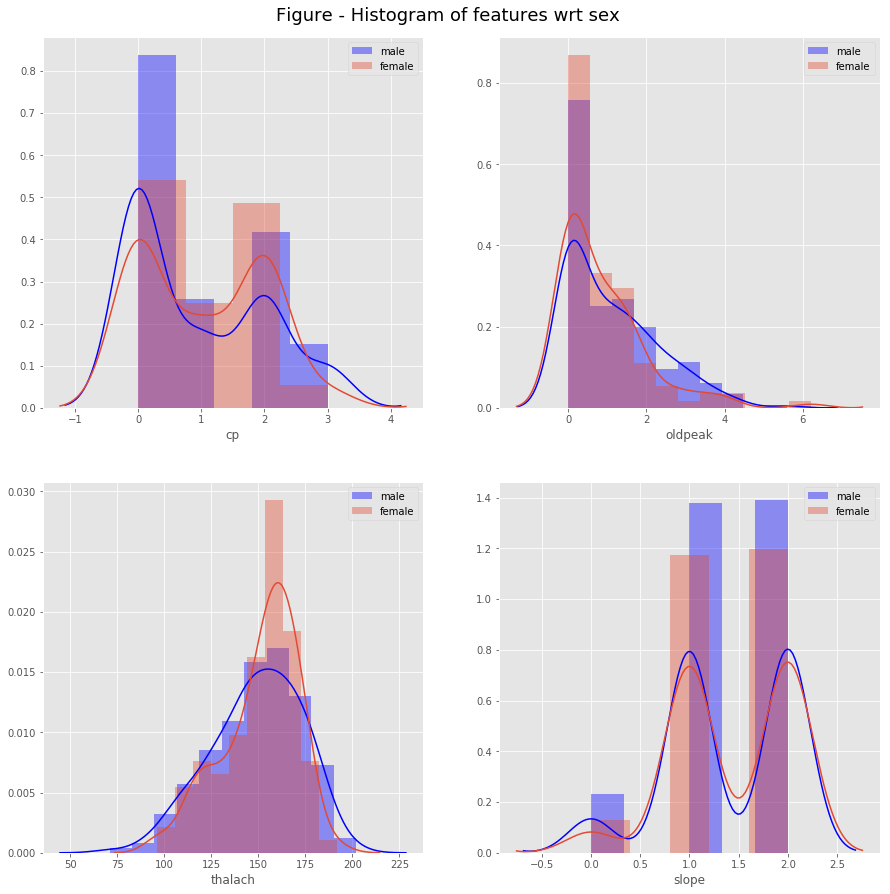

In [17]:
vars = np.array(['cp', 'oldpeak', 'thalach', 'slope'])
plt.figure(figsize=(15, 15))
for i in vars:
    plt.subplot(2,2,np.where(i == vars)[0][0]+1)
    sns.distplot(df[i][df['sex'] == 1], color='blue', label='male')
    sns.distplot(df[i][df['sex'] == 0], label='female')
    plt.legend()
    
plt.suptitle('Figure - Histogram of features wrt sex', x=0.5, y=0.9, verticalalignment='center', fontsize= 18)
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
import xgboost as xgb

## Create features and labels 

In [19]:
y = df['target']
x = df.drop(columns=['target'])

# Support Vector Classification using Linear Kernel

## Normalising dataset

In [20]:
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [21]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, random_state=5)

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (227, 13)
X test:  (76, 13)
y train:  (227,)
y test:  (76,)


In [22]:
lr = svm.SVC(kernel='linear')
lr.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [23]:
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.8947368421052632

In [24]:
confusion_matrix(y_test, y_pred)

array([[33,  5],
       [ 3, 35]])

In [25]:
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.875, 0.9210526315789473, 0.8974358974358975, None)

## Without normalising dataset

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=5)

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (227, 13)
X test:  (76, 13)
y train:  (227,)
y test:  (76,)


In [27]:
lr = svm.SVC(kernel='linear')
lr.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.9078947368421053

In [29]:
confusion_matrix(y_test, y_pred)

array([[33,  5],
       [ 2, 36]])

In [30]:
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.8780487804878049, 0.9473684210526315, 0.9113924050632912, None)

# Logistic regression 

In [31]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=5)

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (212, 13)
X test:  (91, 13)
y train:  (212,)
y test:  (91,)


In [32]:
lr = LogisticRegression(C=0.1, solver='liblinear')
lr.fit(X_train, y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [33]:
y_pred = lr.predict(X_test)
lr.score(X_test, y_test)

0.9230769230769231

In [34]:
confusion_matrix(y_test, y_pred)

array([[39,  4],
       [ 3, 45]])

In [35]:
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.9183673469387755, 0.9375, 0.9278350515463918, None)

# Stochastic Gradient Descent (SGD)

In [36]:
scaler = StandardScaler().fit(x)
rescaledX = scaler.transform(x)

/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [37]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, y, test_size=0.15, random_state=5)

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (257, 13)
X test:  (46, 13)
y train:  (257,)
y test:  (46,)


In [38]:
sgd = SGDClassifier(max_iter=50, random_state=5)
sgd.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=50,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=5, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [39]:
y_pred = lr.predict(X_test)
sgd.score(X_test, y_test)

0.9130434782608695

In [40]:
confusion_matrix(y_test, y_pred)

array([[20,  2],
       [ 6, 18]])

In [41]:
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.9, 0.75, 0.8181818181818182, None)

# XGBoost Model

In [42]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=5)

print("X train: ", X_train.shape)
print("X test: ", X_test.shape)
print("y train: ", y_train.shape)
print("y test: ", y_test.shape)

X train:  (272, 13)
X test:  (31, 13)
y train:  (272,)
y test:  (31,)


In [43]:
accuracy = []

max_dep = range(1,10)

for i in max_dep:
    xg = xgb.XGBClassifier(max_depth=i, min_samples_leaf=2)
    xg.fit(X_train, y_train)
    accuracy.append(xg.score(X_test, y_test))
    
print('List of accuracy: ', accuracy)    

List of accuracy:  [0.8709677419354839, 0.8709677419354839, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129, 0.9032258064516129]


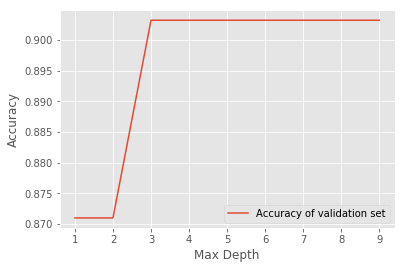

In [44]:
plt.plot(max_dep, accuracy, label='Accuracy of validation set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()
plt.show()

In [45]:
xg =  xgb.XGBClassifier(max_depth=3, min_samples_leaf=2)
xg.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, min_samples_leaf=2, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [46]:
y_pred = xg.predict(X_test)
xg.score(X_test, y_test)

0.9032258064516129

In [47]:
confusion_matrix(y_test, y_pred)

array([[14,  2],
       [ 1, 14]])

In [48]:
precision_recall_fscore_support(y_test, y_pred, average='binary')

(0.875, 0.9333333333333333, 0.9032258064516129, None)